<h1 style="color:DodgerBlue;">Code for Plotting Sodium Chronoamperometry Data</h1>

charge current: 1.0000176185227274mA
total moles of gas consumed: 37.03898183023641
total moles of gas evolved: 29.145019366954983
charge cap= 0.9904723283317354
oer/orr: 0.7941124906284915
final current= 0.014995442
charge time (h) : 3.2943631267811893
charge current: 0.4999917981632654mA
total moles of gas consumed: 38.34921791148001
total moles of gas evolved: 34.710670778752444
charge cap= 0.9616360420154202
oer/orr: 0.9049059745343073
final current= 0.0050289221
charge time (h) : 6.337531312159173


()

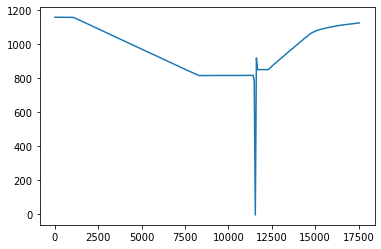

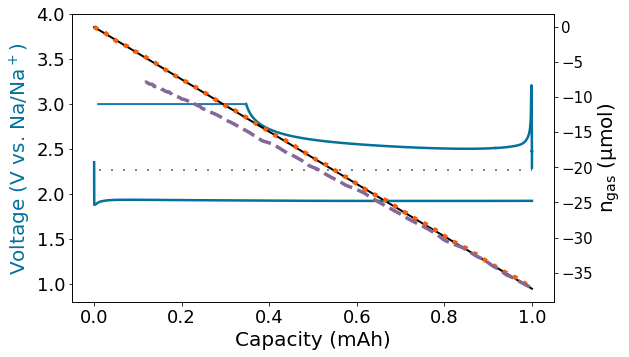

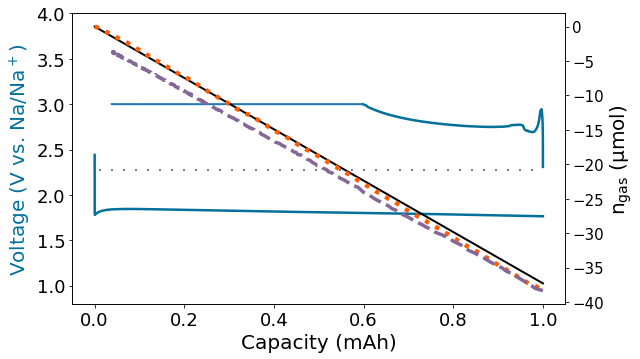

In [26]:
import sys
sys.path.insert(0, '/Users/kedzie/Documents/Berkeley/notebooks/utilities')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

from utility_functions.utils import * #read_data, read_press, getnearpos, folder_files, headspace
from matplotlib import rcParams as rc
rc['mathtext.default'] = 'regular'

def oerorr(oer, orr):
    return(oer/orr)

na1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180819_Na_cycling_chronamp_3V/180818_Na_cycling_cel180819_Na_cycling_chronamp_3V_cycle1_p_Ch3__2018-08-19_13.30_42.txt')
nafold = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180819_Na_cycling_chronamp_3V/')

plt.plot(na1['time/s'], na1['pressure/torr'])
plot_na_CA(nafold[3], nafold[6], nafold[7], nafold[8], na1, 1, 'b')



na2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/200224_Na_10%binder_MCMB0203_CA_cell2_cycle1_Ch2__2020-02-24_12.42_04.txt')
nafold2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/')
plot_na_CA(nafold2[1], nafold2[3], nafold2[4], nafold2[5], na2, 2, 'b')



total moles of gas consumed: 24.692946046424595
total moles of gas evolved: 24.277425298982465
charge cap= 0.6700039323833253
oer/orr: 0.9803316914352284
final current= 0.005024326500000001
charge time (h) : 3.227697460921639
total moles of gas consumed: 21.12154287310173
total moles of gas evolved: 21.310309556233832
charge cap= 0.5941040358609624
oer/orr: 1.0066100367495303
final current= 0.0050790240000000006
charge time (h) : 3.083358629335846
total moles of gas consumed: 19.498836971463078
total moles of gas evolved: 19.20372399205928
charge cap= 0.5395989223486846
oer/orr: 0.9832177044158759
final current= 0.0050491313
charge time (h) : 3.035981129909459
total moles of gas consumed: 23.667407791012252
total moles of gas evolved: 22.918406312334497
charge cap= 1.7151008587744498
oer/orr: 0.9712000492935606
final current= 0.0050231949
charge time (h) : 3.168279517196575


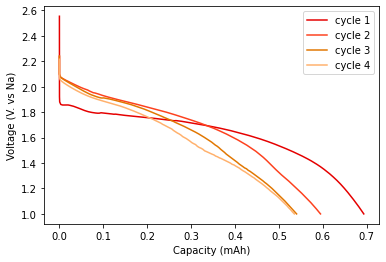

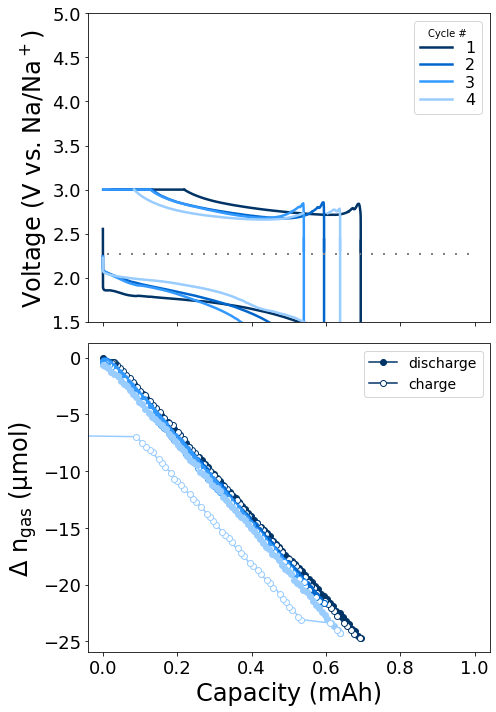

In [19]:
#this function plots two subplots for a sodium chronoamperometry cell:

#potential, gas, and current vs capacity are all ploted 

def plot_na_CA(discharge, cp1, cp2, ca, press, ch, c, leg=None):
    #set number e- per process
    n=1
    i_dis = -1*np.mean( discharge['I/mA'] ) #calculate discharge and charge current (mA)
    i_ch = np.mean(cp1['I/mA'])
    print('charge current: ' + str(i_ch) + 'mA')
    if leg == None:
        leg=''
    
    cp2['Capacity/mA.h'] = cp2['Capacity/mA.h'] + cp1['Capacity/mA.h'].iloc[-1]
    ca['Capacity/mA.h'] = ca['Capacity/mA.h'] + cp2['Capacity/mA.h'].iloc[-1]   
    umoles = press['pressure/torr']/760*headspace(ch)/(press['temperature/C']+273)/0.082057
    umoles = umoles-umoles.iloc[0]
    
    cap = []
    curr = []

    files_ec = pd.concat([discharge, cp1, cp2, ca], sort=True) ##### add cp2
    
    for i in range(len(umoles)):
        dex = getnearpos( files_ec['time/s'], press['time/s'].iloc[i] )
        cap.append( files_ec['Capacity/mA.h'].iloc[dex] )
        curr.append( files_ec['I/mA'].iloc[dex] )

    umolesdf = pd.DataFrame( press['time/s'], columns=['time/s'] )
    umolesdf['umoles'] = umoles
    umolesdf['Capacity/mA.h'] = cap
    umolesdf['I/mA'] = curr
    
    
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=cp1['time/s'].iloc[0]
    end2=cp1['time/s'].iloc[-1]
    #st3=cp2['time/s'].iloc[0]
    #end3=cp2['time/s'].iloc[-1]
    st4=ca['time/s'].iloc[0]
    end4=ca['time/s'].iloc[-1]
    end_cap = [discharge['Capacity/mA.h'].iloc[-1], cp1['Capacity/mA.h'].iloc[-1]]#, cp2['Capacity/mA.h'].iloc[-1], ca['Capacity/mA.h'].iloc[-1]]

    
    #fig, (ax, ax3)= plt.subplots(2, sharex=True, figsize= (9,10)) 
    fig, (ax)= plt.subplots( figsize= (9,5)) 
    ax2=ax.twinx()
    
    ax.plot((discharge['Capacity/mA.h']), discharge['Ewe/V'], color='xkcd:ocean blue', label=leg, linewidth=2.5)
    ax.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['Ewe/V'], color='xkcd:ocean blue', label='', linewidth=2.5)
    ax.plot(end_cap[0]-cp2['Capacity/mA.h'], cp2['Ewe/V'], color='xkcd:ocean blue', label='', linewidth=2.5)
    ax.plot(end_cap[0]- ca['Capacity/mA.h'], ca['Ewe/V'], linewidth=2) 
    ax.plot([0.01, 1.0],[2.27,2.27], c='grey', linestyle=(0,(1,5)), linewidth=2)
    

    st_p1 = getnearpos(press['time/s'],st1) #find time at beginning of discharge
    end_p1 = getnearpos(press['time/s'],end1) #find time at end of discharge
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    #st_p3 = getnearpos(press['time/s'],st3)
    #end_p3 = getnearpos(press['time/s'],end3)
    
    st_p4 = getnearpos(press['time/s'],st4)
    end_p4 = getnearpos(press['time/s'],end4)
    umolesdf['umoles'] = umolesdf['umoles']-umolesdf['umoles'].iloc[st_p1]

    
    x=[0, end_cap[0]]
    y=[0,-end_cap[0]*3.6/n/96485*10**6]
    
    print('total moles of gas consumed: ' + str(-umoles.iloc[end_p1]+umoles.iloc[st_p1]))
    print('total moles of gas evolved: ' + str(umoles.iloc[end_p4-5]-umoles.iloc[st_p2]))
    oerorr=(umoles.iloc[end_p4]-umoles.iloc[st_p2])/(-umoles.iloc[end_p1]+umoles.iloc[st_p1])
    
    print('charge cap= ' + str( ca['Capacity/mA.h'].iloc[-1] ) )
    print('oer/orr: '+ str(oerorr))
    print('final current= ' + str(ca['I/mA'].iloc[-1]))
    print('charge time (h) : ' + str((ca['time/s'].iloc[-1]- cp1['time/s'].iloc[0])/3600))

    pressure_gap=umoles.iloc[end_p1]-umoles.iloc[st_p2]

    ax2.plot(x,y, 'k-', linewidth=2, label= str(n)+' e$^-$/O$_2$')
    ax2.plot(umolesdf['Capacity/mA.h'][st_p1:end_p1+1], umolesdf['umoles'][st_p1:end_p1+1], color='xkcd:bright orange', label='discharge', linewidth=4.4, linestyle = ':')
    ax2.plot(end_cap[0]-umolesdf['Capacity/mA.h'][st_p2:end_p4-1], (umolesdf['umoles']+pressure_gap)[st_p2:end_p4-1], color='xkcd:dark lavender', label='charge', linewidth=3.5,  linestyle ='--')
    
    #ax2.plot( [0.025], [-0.5746], 'o', color='orange')

    #recomment again
    #ax3.plot(end_cap[0] - cp1['Capacity/mA.h'], cp1['I/mA'], '-', color='xkcd:green', markersize=2)
    #ax3.plot(end_cap[0] - cp2['Capacity/mA.h'], cp2['I/mA'], '-', color='xkcd:green', markersize=2)
    #ax3.plot(end_cap[0] - ca['Capacity/mA.h'], ca['I/mA'], '-', color='xkcd:green', markersize=2)
    
    
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', color='xkcd:ocean blue', fontsize=20)
    ax2.set_ylabel('n$_{gas}$ ($\mu$mol)', fontsize=20)
    ax.set_xlabel('Capacity (mAh)', fontsize=20)
    #ax2.legend(fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='y', which='major', labelsize=15)
     
    plt.tight_layout()
    ax.set_ylim([0.8,4])

    return ()

# na=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/181106_Na_titrations_CA_fullcharge/')
# press= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/181106_Na_titrations_CA_fullcharge/181106_Na_titrations_CA_cycle1_Ch1__2018-11-06_12.11_23.txt')
# plot_na_CA(na[3], na[5], na[6], na[7], press, 1, 'b')

#print(na[2]['time/s'].iloc[-1]/60/60)
#plt.savefig('/Users/kedzie/Desktop/qual figures/181106_Na_titrations_CA_fullcharge_chronoamperometry cell manuscript version.png', transparent = True, dpi=600, bbox_inches='tight')


# ballmillmcmbcy1=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191007_Na_MCMB717_cyclingstudy/')
# pcy1=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191007_Na_MCMB717_cyclingstudy/191007_Na_MCMB717_cyclingstudy_CA_cycle1_Ch5__2019-10-07_10.33_23.txt')
# plot_na_CA(ballmillmcmbcy1[1], ballmillmcmbcy1[3], ballmillmcmbcy1[4], ballmillmcmbcy1[5], pcy1, 5, 'b')

# mcmbcy2= [ballmillmcmbcy1[8], ballmillmcmbcy1[10],ballmillmcmbcy1[11], ballmillmcmbcy1[12]]
# plot_na_CA(mcmbcy2[0], mcmbcy2[1], mcmbcy2[2], mcmbcy2[3], pcy1, 5, 'b')

mcmb523_1=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell1/')
p523_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell1/191015_MCMB523_cycling_cell1_cy1_Ch1__2019-10-15_12.47_29.txt')
#plot_na_CA(mcmb523_1[1], mcmb523_1[3], mcmb523_1[4], mcmb523_1[5], p523_1, 1, 'b')
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell1/MCMB523_cell1_cycle1.png', transparent = True, dpi=600, bbox_inches='tight')
mcmb523_2= [mcmb523_1[15],mcmb523_1[17], mcmb523_1[18], mcmb523_1[19]]
p523_2 =read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell1/191015_MCMB523_cycling_cell1_cy2_Ch1__2019-10-15_18.07_09.txt')
#plot_na_CA(mcmb523_2[0], mcmb523_2[1], mcmb523_2[2], mcmb523_2[3], p523_2, 1, 'b')
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell1/MCMB523_cell1_cycle2.png', transparent = True, dpi=600, bbox_inches='tight')
mcmb523_3= [mcmb523_1[22],mcmb523_1[24], mcmb523_1[25], mcmb523_1[26]]
p523_3 =read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell1/191015_MCMB523_cycling_cell1_cy3_Ch1__2019-10-15_23.04_19.txt')
#plot_na_CA(mcmb523_2[0], mcmb523_2[1], mcmb523_2[2], mcmb523_2[3], p523_3, 1, 'b')
mcmb523_4= [mcmb523_1[29],mcmb523_1[31], mcmb523_1[32], mcmb523_1[33]]
p523_4= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell1/191015_MCMB523_cycling_cell1_cy4_ch1.txt')
#plot_na_CA(mcmb523_4[0], mcmb523_4[1], mcmb523_4[2], mcmb523_4[3], p523_4, 1, 'b')
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell1/MCMB523_cell1_cycle4.png', transparent = True, dpi=600, bbox_inches='tight')
mcmb523_5= [mcmb523_1[36],mcmb523_1[38], mcmb523_1[39], mcmb523_1[40]]
p523_5= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell1/191015_MCMB523_cycling_cell1_cy5_Ch1__2019-10-16_17.23_32.txt')
#plot_na_CA(mcmb523_5[0], mcmb523_5[1], mcmb523_5[2], mcmb523_5[3], p523_5, 1, 'b')
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell1/MCMB523_cell1_cycle5.png', transparent = True, dpi=600, bbox_inches='tight')


plt.figure()
plt.plot(mcmb523_1[1]['Capacity/mA.h'], mcmb523_1[1]['Ewe/V'], color= 'xkcd:red', label='cycle 1')
plt.plot(mcmb523_2[0]['Capacity/mA.h'], mcmb523_2[0]['Ewe/V'], color= 'xkcd:orange red', label='cycle 2')
plt.plot(mcmb523_3[0]['Capacity/mA.h'], mcmb523_3[0]['Ewe/V'], color= 'xkcd:pumpkin', label='cycle 3')
plt.plot(mcmb523_4[0]['Capacity/mA.h'], mcmb523_4[0]['Ewe/V'], color= 'xkcd:apricot', label='cycle 4')
plt.xlabel('Capacity (mAh)')
plt.ylabel('Voltage (V. vs Na)')
plt.legend()
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell1/MCMB523_cell1_discharge_capacityfade.png', transparent = True, dpi=600, bbox_inches='tight')

dischargeonly= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191106_MCMB523_dischargeonly_SEM/191106_MCMB523_dischargeonly_SEM_Ch2__2019-11-06_08.34_23.txt')
dischargeonly_ec= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191106_MCMB523_dischargeonly_SEM/')
umoles = dischargeonly['pressure/torr']/760*headspace(2)/(dischargeonly['temperature/C']+273)/0.082057

#plot_na_CA(dischargeonly_ec[1], mcmb523_5[1], mcmb523_5[2], mcmb523_5[3], dischargeonly, 2, 'b')


fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

o1=plot_CA_cycles(mcmb523_1[1], mcmb523_1[3], mcmb523_1[4], mcmb523_1[5], p523_1, 1, 1 )
o2=plot_CA_cycles(mcmb523_2[0], mcmb523_2[1], mcmb523_2[2], mcmb523_2[3], p523_2, 1, 2, offset=o1)
o3= plot_CA_cycles(mcmb523_3[0], mcmb523_3[1], mcmb523_3[2], mcmb523_3[3], p523_3, 1, 3,offset=o1+o2)
plot_CA_cycles(mc2_cycles[22], mc2_cycles[24], mc2_cycles[25], mc2_cycles[26], mc2_4, 2, 4, '#99CCFF',offset=o1+o2+o3)

ax.legend(title="Cycle #", fontsize=16, loc='upper right', labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge'], fontsize=14)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell1/MCMB523_cell1_CA_cycling.png', transparent = True, dpi=600, bbox_inches='tight')






In [19]:
lowbinderCA = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200114_10%binder_MCMB1202_cycling_CA/200114_10%binder_MCMB1202_cycling_CA_cycle1_Ch1__2020-01-14_17.58_13.txt')
lowbinder = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200114_10%binder_MCMB1202_cycling_CA/')
plot_CA_cycles(lowbinder[1], lowbinder[3], lowbinder[4], lowbinder[5], lowbinderCA, 1, 'b')



IndexError: single positional indexer is out-of-bounds

total moles of gas consumed: 35.62421206342779
total moles of gas evolved: 33.56922371513107
charge cap= 0.9418828702635235
oer/orr: 0.9428973552541317
final current= 0.0050206496000000005
charge time (h) : 7.904906426469389
total moles of gas consumed: 29.034589777580948
total moles of gas evolved: 28.18867861479437
charge cap= 0.7797038099832005
oer/orr: 0.9704106740966532
final current= 0.0050371946
charge time (h) : 4.96387405101253
total moles of gas consumed: 25.199286320033735
total moles of gas evolved: 24.45427587456335
charge cap= 0.6783066151870621
oer/orr: 0.970687701474058
final current= 0.0050219222999999995
charge time (h) : 3.472485513513496
total moles of gas consumed: 23.667407791012252
total moles of gas evolved: 22.918406312334497
charge cap= 0.6398781037165059
oer/orr: 0.9712000492935606
final current= 0.0050231949
charge time (h) : 3.168279517196575


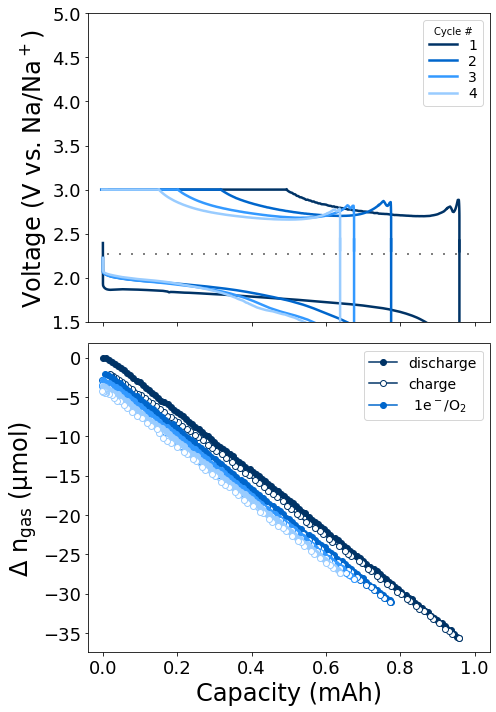

In [16]:
def plot_CA_cycles(discharge, cp1, cp2, ca, press, ch, cyclenum=1, leg=None, offset=0):
    
    n=1
    i_dis = -1*np.mean( discharge['I/mA'] ) #calculate discharge and charge current (mA)
    i_ch = np.mean(cp1['I/mA'])
    cp2['Capacity/mA.h'] = cp2['Capacity/mA.h'] + cp1['Capacity/mA.h'].iloc[-1]
    ca['Capacity/mA.h'] = ca['Capacity/mA.h'] + cp2['Capacity/mA.h'].iloc[-1]   
    umoles = press['pressure/torr']/760*headspace(ch)/(press['temperature/C']+273)/0.082057
    umoles = umoles-umoles.iloc[0]
    col = ['#003366', '#0066CC', '#3399FF', '#99CCFF']
    
    cap = []
    curr = []
    files_ec = pd.concat([discharge, cp1, cp2, ca], sort=True) 
    
    for i in range(len(umoles)):
        dex = getnearpos( files_ec['time/s'], press['time/s'].iloc[i] )
        cap.append( files_ec['Capacity/mA.h'].iloc[dex] )
        curr.append( files_ec['I/mA'].iloc[dex] )

    umolesdf = pd.DataFrame( press['time/s'], columns=['time/s'] )
    umolesdf['umoles'] = umoles
    umolesdf['Capacity/mA.h'] = cap
    umolesdf['I/mA'] = curr
    
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=cp1['time/s'].iloc[0]
    end2=cp1['time/s'].iloc[-1]
    st3=cp2['time/s'].iloc[0]
    end3=cp2['time/s'].iloc[-1]
    st4=ca['time/s'].iloc[0]
    end4=ca['time/s'].iloc[-1]
    end_cap = [discharge['Capacity/mA.h'].iloc[-1], cp1['Capacity/mA.h'].iloc[-1], cp2['Capacity/mA.h'].iloc[-1], ca['Capacity/mA.h'].iloc[-1]]

    ax.plot((discharge['Capacity/mA.h']), discharge['Ewe/V'], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label = cyclenum )
    ax.plot([end_cap[0], end_cap[0]-cp1['Capacity/mA.h'].iloc[5] ], [discharge['Ewe/V'].iloc[-1], cp1['Ewe/V'].iloc[5] ], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label='')
    ax.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['Ewe/V'], color=col[cyclenum-1], label='', linewidth=2.5)
    ax.plot(end_cap[0]-cp2['Capacity/mA.h'], cp2['Ewe/V'], color=col[cyclenum-1] , label='', linewidth=2.5)
    ax.plot(end_cap[0]- ca['Capacity/mA.h'], ca['Ewe/V'], color= col[cyclenum-1], linewidth=2.5, label='') 
    ax.plot([0.01, 1.0],[2.27,2.27], c='grey', linestyle=(0,(1,5)), linewidth=2, label='')
    

    st_p1 = getnearpos(press['time/s'],st1) #find time at beginning of discharge
    end_p1 = getnearpos(press['time/s'],end1) #find time at end of discharge
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    st_p3 = getnearpos(press['time/s'],st3)
    end_p3 = getnearpos(press['time/s'],end3)
    
    st_p4 = getnearpos(press['time/s'],st4)
    end_p4 = getnearpos(press['time/s'],end4)
    umolesdf['umoles'] = umolesdf['umoles']-umolesdf['umoles'].iloc[st_p1]
    
    x=[0, end_cap[0]]
    y=[0+offset,-end_cap[0]*3.6/n/96485*10**6+offset]
    
    print('total moles of gas consumed: ' + str(-umoles.iloc[end_p1]+umoles.iloc[st_p1]))
    print('total moles of gas evolved: ' + str(umoles.iloc[end_p4-5]-umoles.iloc[st_p2]))
    oerorr=(umoles.iloc[end_p4]-umoles.iloc[st_p2])/(-umoles.iloc[end_p1]+umoles.iloc[st_p1])
    
    print('charge cap= ' + str( ca['Capacity/mA.h'].iloc[-1] ) )
    print('oer/orr: '+ str(oerorr))
    print('final current= ' + str(ca['I/mA'].iloc[-1]))
    print('charge time (h) : ' + str((ca['time/s'].iloc[-1]- cp1['time/s'].iloc[0])/3600))


    pressure_gap=umoles.iloc[end_p1]-umoles.iloc[st_p2]
    
    ax2.plot(umolesdf['Capacity/mA.h'][st_p1:end_p1+1], umolesdf['umoles'][st_p1:end_p1+1]+offset,  'o-', color= col[cyclenum-1], linewidth=1.5, markersize=6, label='')#, markevery=(0.0,0.02))
    ax2.plot(end_cap[0]-umolesdf['Capacity/mA.h'][st_p2:end_p4-1], (umolesdf['umoles'])[st_p2:end_p4-1]+pressure_gap+offset,  'o-', color=col[cyclenum-1], linewidth=1.5, markersize=6, mfc='white', markevery=(0.0,0.012), label='')
    #ax2.plot(x,y, 'k-',  c='#606060', linestyle='--', label= '',linewidth= 1)
    
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', fontsize=24)
    ax2.set_ylabel('$\Delta$ n$_{gas}$ ($\mu$mol)', fontsize=24)
    ax2.set_xlabel('Capacity (mAh)', fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    ax.set_ylim([1.5,5])
    ax.set_xlim([-0.04,1.04])
    plt.tight_layout()
    return ( umolesdf['umoles'][end_p4-1]+pressure_gap )

mc2_cycles = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/')
mc2_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy1_Ch2__2019-10-15_12.47_45.txt')
mc2_2= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy2_Ch2__2019-10-16_11.41_02.txt')
mc2_3= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy3_Ch2__2019-10-17_09.47_00.txt')
mc2_4= read_press ('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy4_Ch2__2019-10-17_16.07_50.txt')

colors = ['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

o1=plot_CA_cycles(mc2_cycles[1], mc2_cycles[3], mc2_cycles[4], mc2_cycles[5], mc2_1, 2, 1,'#003366' )
o2=plot_CA_cycles(mc2_cycles[8], mc2_cycles[10], mc2_cycles[11], mc2_cycles[12], mc2_2, 2, 2, '#0066CC', offset=o1)
o3= plot_CA_cycles(mc2_cycles[15], mc2_cycles[17], mc2_cycles[18], mc2_cycles[19], mc2_3, 2, 3, '#3399FF',offset=o1+o2)
plot_CA_cycles(mc2_cycles[22], mc2_cycles[24], mc2_cycles[25], mc2_cycles[26], mc2_4, 2, 4, '#99CCFF',offset=o1+o2+o3)


ax.legend(title="Cycle #", fontsize=14, loc='upper right', labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge', ' 1e$^-$/O$_2$' ], fontsize=14)

#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/mcmb523 CA cycling.png', transparent = True, dpi=600, bbox_inches='tight')





total moles of gas consumed: 36.42747765188693
total moles of gas evolved: 32.7225128009711
charge cap= 0.9824434171120326
oer/orr: 0.8976080290471581
final current= 0.014995275
total moles of gas consumed: 38.15924265644571
total moles of gas evolved: 34.16173766159419
charge cap= 1.007643217841784
oer/orr: 0.8931316224992922
final current= 0.015042348
total moles of gas consumed: 37.33058615099017
total moles of gas evolved: 34.31388883747131
charge cap= 1.0016669084628425
oer/orr: 0.9190930208375215
final current= 0.015058887
total moles of gas consumed: 32.69271509480201
total moles of gas evolved: 34.60961479677354
charge cap= 1.0009409404463239
oer/orr: 1.0546790609212209
final current= 0.014987005


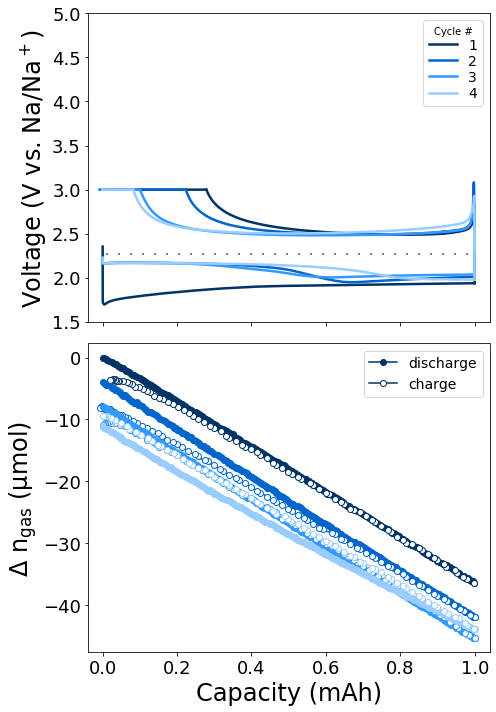

In [14]:
p50=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell1/')
p50_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell1/180814_Na_lowercurrents_cell1_cycle1_p_Ch4__2018-08-14_11.11_53.txt')
p50_2=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell1/180814_Na_lowercurrents_cell1_cycle2_p_Ch4__2018-08-14_16.49_14.txt')
p50_3=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell1/180814_Na_lowercurrents_cell1_cycle3_p_Ch4__2018-08-15_09.40_31.txt')
p50_4=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell1/180814_Na_lowercurrents_cell1_cycle4_p_Ch4__2018-08-15_14.37_07.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

o1=plot_CA_cycles(p50[3], p50[6], p50[7], p50[8], p50_1, 4, 1 )
o2=plot_CA_cycles(p50[13], p50[16], p50[17], p50[18],p50_2, 4, 2, offset=o1)
o3=plot_CA_cycles(p50[23], p50[26], p50[27], p50[28],p50_3, 4, 3, offset=o1+o2)
o4=plot_CA_cycles(p50[33], p50[36], p50[37], p50[38],p50_4, 4, 4, offset = o1+o2+o3)

ax.legend(title="Cycle #", fontsize=14, loc='upper right', labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge' ], fontsize=14)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell1/p50 CA cycling.png', transparent = True, dpi=600, bbox_inches='tight')




total moles of gas consumed: 36.42747765188693
total moles of gas evolved: 32.7225128009711
charge cap= 0.9824434171120326
oer/orr: 0.8976080290471581
final current= 0.014995275
total moles of gas consumed: 38.15924265644571
total moles of gas evolved: 34.16173766159419
charge cap= 1.007643217841784
oer/orr: 0.8931316224992922
final current= 0.015042348
total moles of gas consumed: 37.33058615099017
total moles of gas evolved: 34.31388883747131
charge cap= 1.0016669084628425
oer/orr: 0.9190930208375215
final current= 0.015058887
total moles of gas consumed: 32.69271509480201
total moles of gas evolved: 34.60961479677354
charge cap= 1.0009409404463239
oer/orr: 1.0546790609212209
final current= 0.014987005


FileNotFoundError: [Errno 2] No such file or directory: '/Users/kedzie/Desktop/191209_10%binder_MCMB1202_cycling_CA_cell2/'

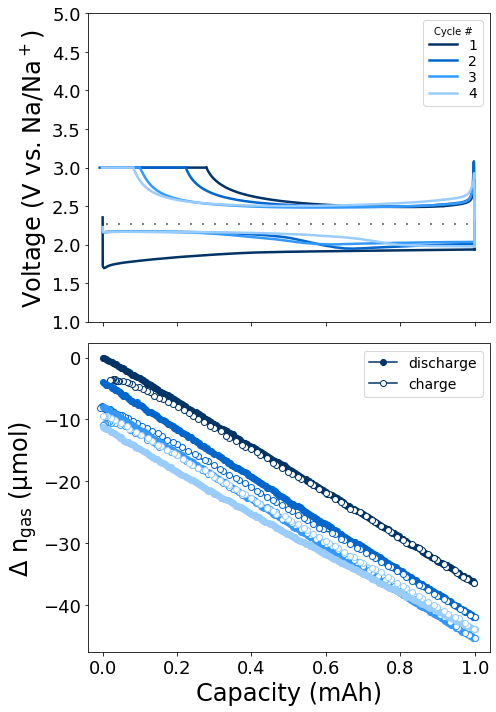

In [7]:

lessbinder=folder_files('/Users/kedzie/Desktop/191209_10%binder_MCMB1202_cycling_CA_cell2/')
b1= read_press('/Users/kedzie/Desktop/191209_10%binder_MCMB1202_cycling_CA_cell2/191208_10%binder_MCMB1202_cycling_CA_cycle1_Ch2__2019-12-09_11.52_03.txt')
b2= read_press('/Users/kedzie/Desktop/191209_10%binder_MCMB1202_cycling_CA_cell2/191208_10%binder_MCMB1202_cycling_CA_cycle2_Ch2__2019-12-09_23.30_26.txt')
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

#plot_CA_cycles(lessbinder[1], lessbinder[3], lessbinder[4], lessbinder[5], b1, 2, 1,'#003366' )
#plot_CA_cycles(lessbinder[8], lessbinder[10], lessbinder[11], lessbinder[12],b2, 4, 2, '#0066CC')


ax.legend(title="Cycle #", fontsize=14, loc='upper right', labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge' ], fontsize=14)
#plt.savefig('/Users/kedzie/Desktop/191209_10%binder_MCMB1202_cycling_CA_cell2/less binder cycling mcmb', transparent = True, dpi=600, bbox_inches='tight')



charge current: 0.49993336172413794mA
total moles of gas consumed: 36.683802319794964
total moles of gas evolved: 35.0109867557279
charge cap= 0.4159364228447278
oer/orr: 0.9554718017928591
final current= 0.0050310958000000005
charge current: 0.9998556870689655mA
total moles of gas consumed: 36.45371431140185
total moles of gas evolved: 34.73386631833229
charge cap= 0.3791272971365187
oer/orr: 0.9517482651792096
final current= 0.0050262347999999995
charge current: 0.999849209125mA
total moles of gas consumed: 35.91245078164472
total moles of gas evolved: 32.43033113367488
charge cap= 0.5833319905731413
oer/orr: 0.9087038155615703
final current= 0.059748035
charge current: 0.9999316786419754mA
total moles of gas consumed: 36.579298136247786
total moles of gas evolved: 34.55301142672248
charge cap= 0.4353618042336569
oer/orr: 0.9454517181990313
final current= 0.0050679883
-1
o2 consumed: 37.05004866800189
o2 evolved: 33.13265296406985
0.8942674613187408
-1
o2 consumed: 36.17020741939527


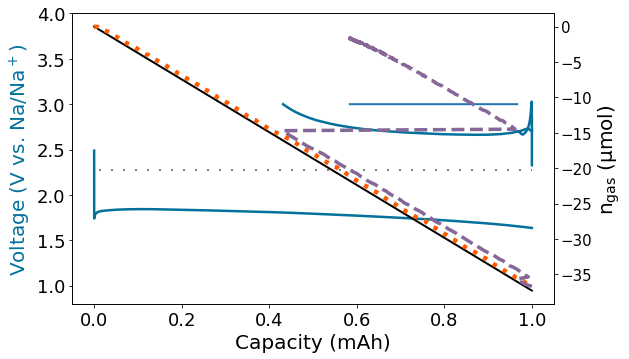

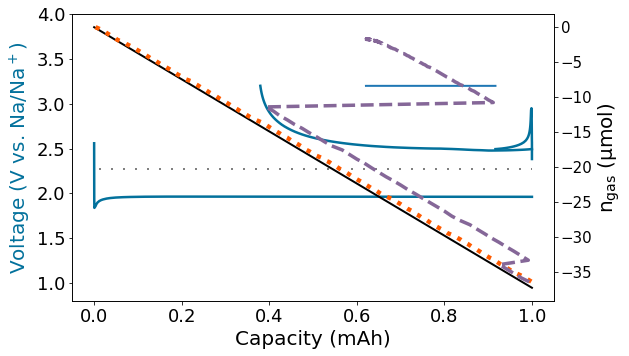

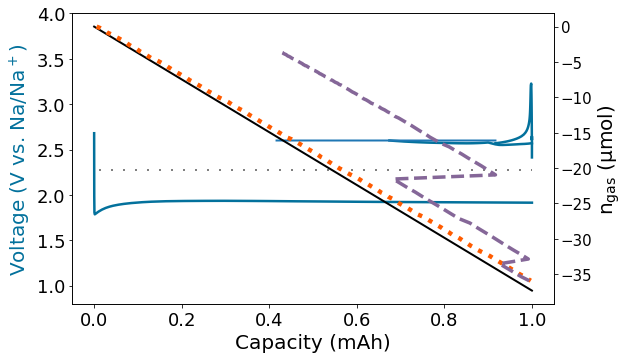

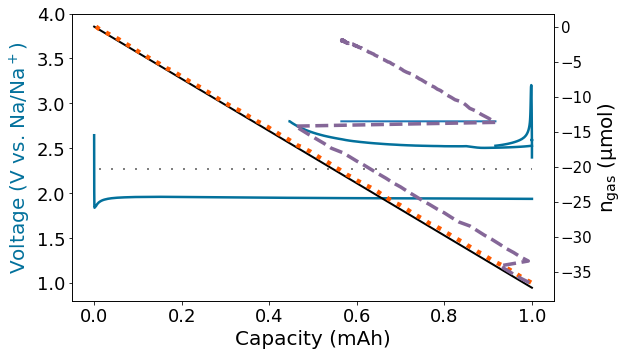

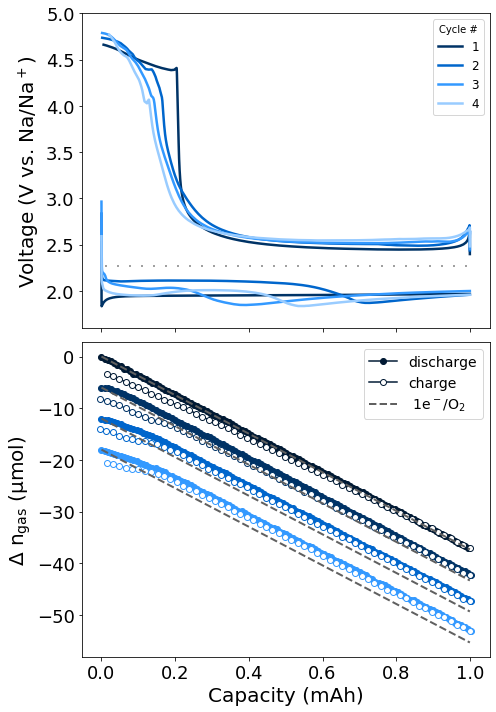

In [8]:
mct1= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190613_Na_MCMB523_CA_cycling/')
mct1_p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190613_Na_MCMB523_CA_cycling/190613_Na_MCMB523_CA_cycling_Ch3__2019-06-13_11.24_37.txt')

plot_na_CA(mct1[1], mct1[3],mct1[4], mct1[5], mct1_p, 3, 'b')

# mct2= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190613_Na_MCMB523_PEIS_CV/190613_postPEIS_CA_cycle/')
# mct2_p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190613_Na_MCMB523_PEIS_CV/190613_postPEIS_CA_cycle/190613_Na_MCMB523_CA_p_Ch4__2019-06-13_14.54_06.txt')
#plot_na_CA(mct2[1], mct2[3],mct2[4], mct2[5], mct2_p, 4, 'b')

highV= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190716_Na_3,2V_CAcutoff_test2/')
highVp= read_press('//Users/kedzie/Documents/Berkeley/Research/Data/2019/190716_Na_3,2V_CAcutoff_test2/190716_Na_3,2V_CAcutoff_test2_Ch1__2019-07-16_13.36_59.txt')
plot_na_CA(highV[1], highV[3], highV[4], highV[5], highVp, 1, 'b')
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190716_Na_3,2V_CAcutoff_test2/190716_Na_3,2V_CAcutoff_cycle.png', transparent = True, dpi=600, bbox_inches='tight')



V26=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190716_Na_2,6V_CAcutoff/')
V26p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190716_Na_2,6V_CAcutoff/190716_Na_2,6V_CAcutoff_p_Ch4__2019-07-16_13.34_29.txt')
plot_na_CA(V26[1], V26[3], V26[4], V26[5], V26p, 4, 'b')
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190716_Na_2,6V_CAcutoff/190716_Na_2,6V_CAcutoff_cycle.png', transparent = True, dpi=600, bbox_inches='tight')



V28=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190716_Na_2,8V_CAcutoff/')
V28p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190716_Na_2,8V_CAcutoff/190716_Na_2,8V_CAcutoff_p_Ch3__2019-07-16_13.35_36.txt')
plot_na_CA(V28[1], V28[3], V28[4], V28[5], V28p, 3, 'b')
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190716_Na_2,8V_CAcutoff/190716_Na_2,8V_CAcutoff_cycle.png', transparent = True, dpi=600, bbox_inches='tight')

def plot_cycling(disch, chrg, press, channel, cyclenum, n=None):
    i=cyclenum
    colors=['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']
    n=1
    disc_i= np.mean(disch['I/mA']) #/(np.pi*0.6**2)
    chrg_i= np.mean(chrg['I/mA']) #/(np.pi*0.6**2)
    
    #find the final capacity reached on discharge in mAh
    cap=disch['Capacity/mA.h'].iloc[-1]

    x1=disch['Capacity/mA.h'] #/(np.pi*0.6**2)
    y1=disch['Ewe/V']
    x2=(cap-chrg['Capacity/mA.h']) #/(np.pi*0.6**2)
    y2=chrg['Ewe/V']
    
    endindex=-1
    if (i==4):
        endindex=202
    else:
        endindex=-1        
    ax.plot(x1, y1, c=colors[i], linestyle='-', linewidth=2.5, label = str(i))
    ax.plot(x2[:endindex], y2[:endindex], c=colors[i], linestyle='-', label='', linewidth=2.5)
    ax.plot([0.01,cap],[2.27,2.27], c='#A0A0A0', linestyle=(0,(1,5)), linewidth=2)
    
    st1=disch['time/s'].iloc[0]
    end1=disch['time/s'].iloc[-1]
    
    st2=chrg['time/s'].iloc[0]
    end2=chrg['time/s'].iloc[-1]
    
    #determine start and end indices in pressure df for discharge and charge
    st_p1 = getnearpos(press['time/s'],st1)
    end_p1 = getnearpos(press['time/s'],end1)
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    temp = press['temperature/C']+273
    umoles = press['pressure/torr']/760*headspace(channel)/temp/0.082057
    umoles = umoles-umoles.iloc[st_p1]
    elec_oxy= x1.iloc[-1]*3.6/96485/umoles[end_p1]
    
    disch_cap=(press['time/s']-press['time/s'].iloc[st_p1])*-disc_i/3600
    char_cap=cap -(press['time/s']-press['time/s'].iloc[st_p2])*chrg_i/3600 #divide cap by/(np.pi*.6**2)

    gap= umoles[end_p1]-umoles[st_p2]
    offset=(i-1)*6
    x=[0,cap] #/(np.pi*0.6**2)]
    y=[0-offset,-cap*3.6/n/96485*10**6-offset]
    
    ax2.plot(disch_cap[st_p1:end_p1+1], (umoles)[st_p1:end_p1+1]-offset, 'o-', color= colors[i-1], linewidth=1.5, markersize=6, label='')
    ax2.plot(char_cap[st_p2:(end_p2+1)], (umoles)[st_p2:(end_p2+1)]+gap-offset, 'o-', color=colors[i-1], linewidth=1.5, markersize=6, mfc='white', label='')
    ax2.plot(x, y,  c='#606060', linestyle='--', label= '',linewidth= 2)

    print(endindex)
    print("o2 consumed: "+ str(umoles[st_p1]-(umoles[end_p1+1] )))
    print("o2 evolved: "+ str(umoles[end_p2]-(umoles[st_p2+1] )))
    print((umoles[end_p2]-(umoles[st_p2+1]))/(umoles[st_p1]-(umoles[end_p1+1])))

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', fontsize=20)
    ax2.set_xlabel('Capacity (mAh)', fontsize=20)
    ax2.set_ylabel('$\Delta$ n$_{gas}$ ($\mu$mol)', fontsize=20)
    plt.tight_layout()
    ax.set_ylim([1.6,5])
    
    return

cp1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/cell1_cycle1_Ch3__2018-09-10_13.00_13.txt')
cp1_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/')

cp2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/cell1_cycle2_Ch3__2018-09-10_17.40_12.txt')
cp3 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/cell1_cycle3_Ch3__2018-09-10_21.36_59.txt')
cp4 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180910_Na_cycling_chronopotentiometry_cell1/cell1_cycle4_Ch3__2018-09-11_08.44_02.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
plot_cycling(cp1_ec[3],cp1_ec[5], cp1, 3, 1)
plot_cycling(cp1_ec[10],cp1_ec[12], cp2, 3, 2)
plot_cycling(cp1_ec[17],cp1_ec[19], cp3, 3, 3)
plot_cycling(cp1_ec[24],cp1_ec[27], cp4, 3, 4)
ax.legend(title="Cycle #", fontsize=12)
ax2.legend(labels=['discharge', 'charge', ' 1e$^-$/O$_2$' ], fontsize=14)
#plt.savefig('/Users/kedzie/Desktop/p50 cp cycling.png', transparent= True, dpi=600, bbox_inches='tight')




charge current: 0.4999561512820513mA
total moles of gas consumed: 36.84952197870558
total moles of gas evolved: 35.44289248789262
charge cap= 0.989261865615845
oer/orr: 0.9612243377212314
final current= 0.0050383196000000005
charge current: 0.49980649488372086mA


IndexError: single positional indexer is out-of-bounds

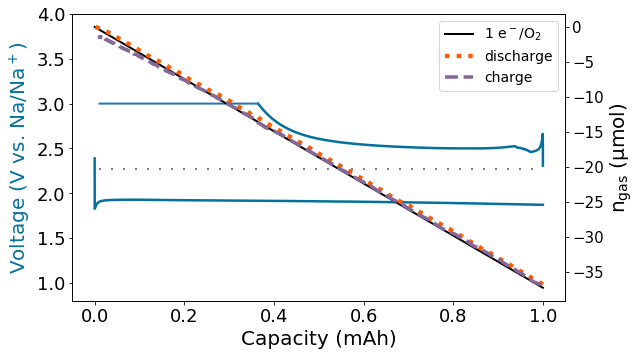

In [4]:
superior= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190513_Na_Superiorgraphite_CA_test/')
supp= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190513_Na_Superiorgraphite_CA_test/190513_Na_Superiorgraphite_CA_test_p_Ch1__2019-05-13_11.17_00.txt')
plot_na_CA(superior[1], superior[3], superior[4], superior[5], supp, 1, 'b')
#plt.savefig('/Users/kedzie/Desktop/qual figures/superior CA cycle.png', transparent = True, dpi=600, bbox_inches='tight')


# mcmb1=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190514_Na_MCMB_CA_cyclingstudy_cycle1/')
# mcmb1p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190514_Na_MCMB_CA_cyclingstudy_cycle1/190514_Na_MCMB_CA_cyclingstudy_Ch1__2019-05-14_14.48_25.txt')
# plot_na_CA(mcmb1[1], mcmb1[3], mcmb1[4], mcmb1[5], mcmb1p, 1, 'b')

#mcmb519_1= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190517_Na_newMCMB_CA_cycling/')
#m5191p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190517_Na_newMCMB_CA_cycling/190517_Na_newMCMB_CA_cycling_cycle1_Ch1__2019-05-17_10.59_42.txt')
#plot_na_CA(mcmb519_1[1], mcmb519_1[3], mcmb519_1[4], mcmb519_1[5], m5191p, 1, 'b')

mcmb519_2= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190521_Na_newMCMB_CA/')
m5191p2= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190521_Na_newMCMB_CA/190521_Na_newMCMB_cycling_cycle1_Ch1__2019-05-21_13.21_51.txt')
plot_na_CA(mcmb519_2[1], mcmb519_2[3], mcmb519_2[4], mcmb519_2[5], m5191p2, 1, 'b')

mcmb519_3=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190523_Na_newMCMB_cycling/')
mcmb5193p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190523_Na_newMCMB_cycling/190523_Na_newMCMB_cycling_cycle1_Ch1__2019-05-23_13.27_49.txt')
plot_na_CA(mcmb519_3[1], mcmb519_3[3], mcmb519_3[4], mcmb519_3[5], mcmb5193p, 1, 'b')



charge current: 0.9998533772972973mA
total moles of gas consumed: 36.92156085548281
total moles of gas evolved: 33.82316753143637
charge cap= 0.9932945834265815
oer/orr: 0.9165306431413848
final current= 0.015053836999999999
charge current: 0.9996640096551724mA
total moles of gas consumed: 36.45912732800268
total moles of gas evolved: 32.11180351229751
charge cap= 0.876441200574239
oer/orr: 0.8828622148110348
final current= 0.01508808
charge current: 0.9997447872727273mA
total moles of gas consumed: 35.37441647550956
total moles of gas evolved: 29.513477314833736
charge cap= 0.8981096082263522
oer/orr: 0.8376672584851389
final current= 0.015093805


()

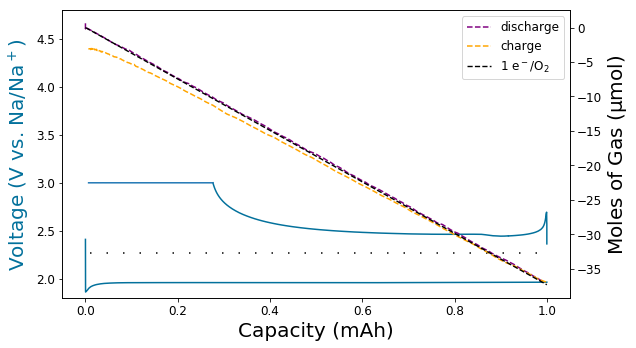

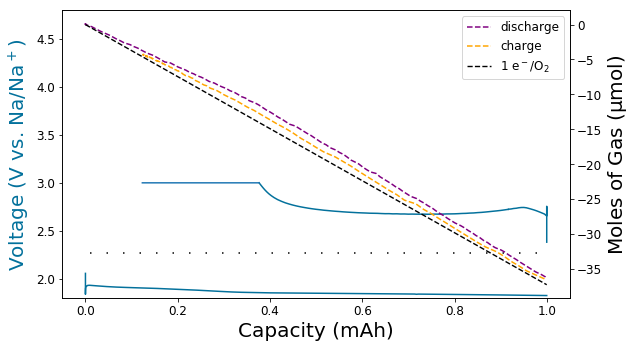

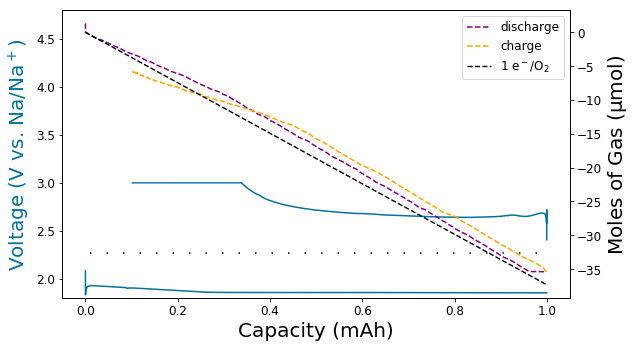

In [34]:


c13= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190206_C13_CA_cycling/')
pp= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190206_C13_CA_cycling/190206_C13_CA_cycling_cycle1_Ch4__2019-02-06_11.12_16.txt')

#plot_na_CA(c13[1], c13[3],c13[4], c13[5],pp, 5, 'b')
#plot_na_CA(c13[8], c13[10],c13[11], c13[12],pp, 5, 'orange')

xc7= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190227_Na_testXC72withCA/')
p7= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190227_Na_testXC72withCA/190227_Na_testXC72withCA_p_Ch1__2019-02-27_12.28_47.txt')
#plot_na_CA(xc7[1], xc7[3], xc7[4], xc7[5], p7, 1, 'b')
#plt.savefig('/Users/kedzie/Desktop/xc72 na ca cycling.png', transparent = True, dpi=600, bbox_inches='tight')


newelyte= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190227_Na_test_newelyte_p50/')
elytep= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190227_Na_test_newelyte_p50/190222_004LG_7h-190227_Na_test_newelyte_p50_Ch3__2019-02-27_12.13_55.txt')
plot_na_CA(newelyte[1], newelyte[3], newelyte[4], newelyte[5], elytep, 3, 'b')

sieves= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190308_Na_newelytetest_molsieves24h/')
plot_na_CA(sieves[1], sieves[3], sieves[4], sieves[5], elytep, 3, 'b')

charge current: 0.020064749176470588mA
total moles of gas consumed: 0.5998666076377219
total moles of gas evolved: 0.08438820355877397
charge cap= 0.003988969967597061
oer/orr: 0.13434008558177268
final current= 0.0050628996


()

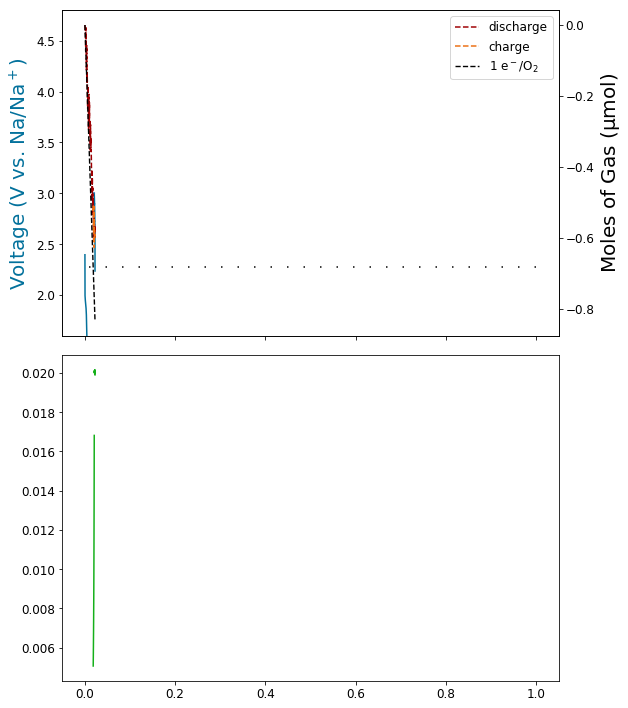

In [45]:
cmcfold= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190624_Na_MCMB_CMCSBR_CA/')
cmcCA= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190624_Na_MCMB_CMCSBR_CA/190624_Na_MCMB_CMCSBR_CA_p_Ch3_edittime.txt')
plot_na_CA(cmcfold[1], cmcfold[3], cmcfold[4], cmcfold[5], cmcCA, 3, 'b')




charge current: 0.4997063609302325mA
total moles of gas consumed: 36.3777601344792
total moles of gas evolved: 35.486203267870096
charge cap= 0.9747736818260617
oer/orr: 0.9770276323408132
final current= 0.0050325952
charge current: 0.4999070252380952mA
total moles of gas consumed: 36.82177888148824
total moles of gas evolved: 29.691716048881574
charge cap= 0.8209605597787433
oer/orr: 0.8091775929671966
final current= 0.069493435


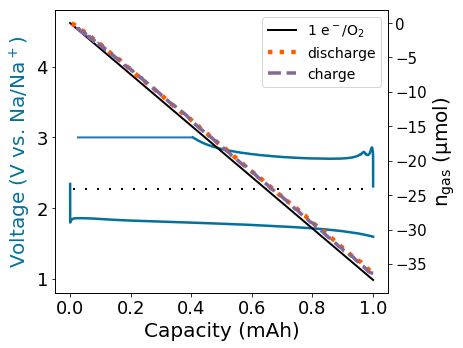

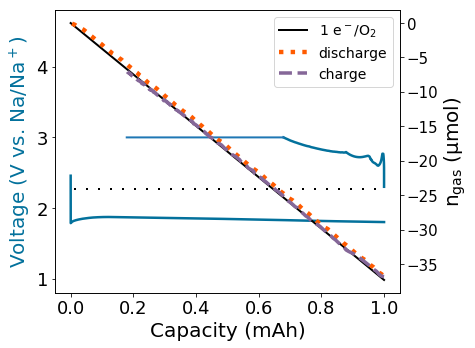

In [73]:
repeatmcmb=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190430_Na_MCMB_CA_repeat/')
mcpre= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190430_Na_MCMB_CA_repeat/190430_Na_MCMB_CA_repeat_press_Ch1__2019-04-30_10.45_43.txt')
plot_na_CA(repeatmcmb[1], repeatmcmb[3], repeatmcmb[4], repeatmcmb[5], mcpre, 1, 'b')
plt.savefig('/Users/kedzie/Desktop/qual figures/mcmb CA cycle.png', transparent = True, dpi=600, bbox_inches='tight')

mcmb= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190403_Na_MCMBgraphite_CA_slow/')
mcmbp= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190403_Na_MCMBgraphite_CA_slow/190403_Na_MCMBgraphite_CA_slow_Ch4__2019-04-03_15.20_58.txt')
#plot_na_CA(mcmb[1], mcmb[3], mcmb[4], mcmb[5], mcmbp, 4, 'b')
#plt.savefig('/Users/kedzie/Desktop/mcmb trial 1.png', transparent = True, dpi=600, bbox_inches='tight')


pred= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190430_Na_Pred_CA/')
pp= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190430_Na_Pred_CA/190430_Na_Pred_CA_press_Ch2__2019-04-30_10.46_51.txt')
plot_na_CA(pred[1], pred[3], pred[4], pred[5], pp, 2, 'b')
plt.savefig('/Users/kedzie/Desktop/qual figures/pred CA cycle.png', transparent = True, dpi=600, bbox_inches='tight')





charge current: 1.0003161966666665mA
total moles of gas consumed: 35.65882340912768
total moles of gas evolved: 34.55669681487895
charge cap= 0.9984271228313446
oer/orr: 0.9690452714589473
final current= 0.015069066


FileNotFoundError: [Errno 2] No such file or directory: '/Users/kedzie/Desktop/190413_Na_graphite_MCMB_CA_dems/'

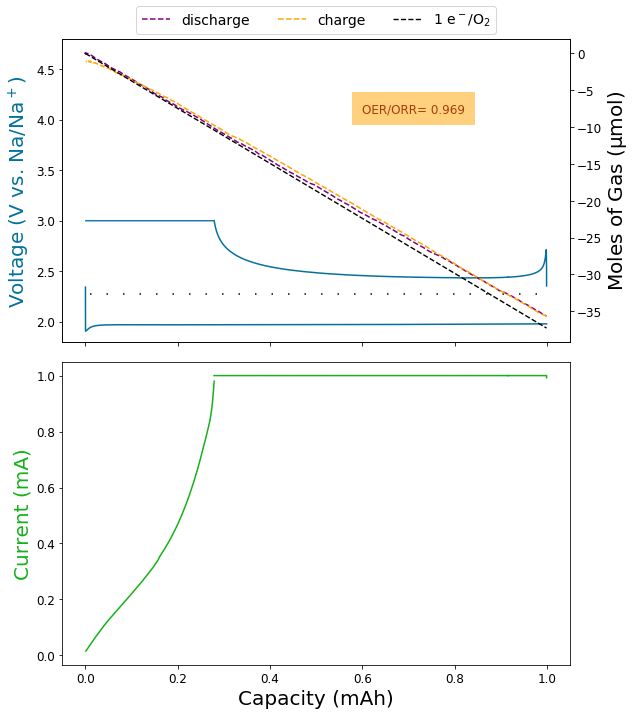

In [6]:
regu= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/181106_Na_titrations_CA_2cycle_90/')
reg_p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/181106_Na_titrations_CA_2cycle_90/181106_Na_titrations_CA_90_cycle1_Ch4__2018-11-06_12.17_22.txt')

plot_na_CA( regu[3],regu[5], regu[6], regu[7], reg_p, 4, 'b')
#plt.savefig('/Users/kedzie/Desktop/regular ca.png', transparent = True, dpi=600, bbox_inches='tight')


mcmbdems= folder_files('/Users/kedzie/Desktop/190413_Na_graphite_MCMB_CA_dems/')

plot_na_CA(mcmbdems[1], mcmbdems[4], mcmbdems[5], mcmbdems[6], reg_p, 1, 'b')

preddems= folder_files('/Users/kedzie/Desktop/190413_Na_graphite_pred_CA_dems/')

plot_na_CA(preddems[1], preddems[4], preddems[5], preddems[6], reg_p, 1, 'b')





charge current: 0.9998902948148147mA
total moles of gas consumed: 37.093522693679475
total moles of gas evolved: 35.67397615004842
charge cap= 0.9771517084704505
oer/orr: 0.9618789795265114
final current= 0.015065243


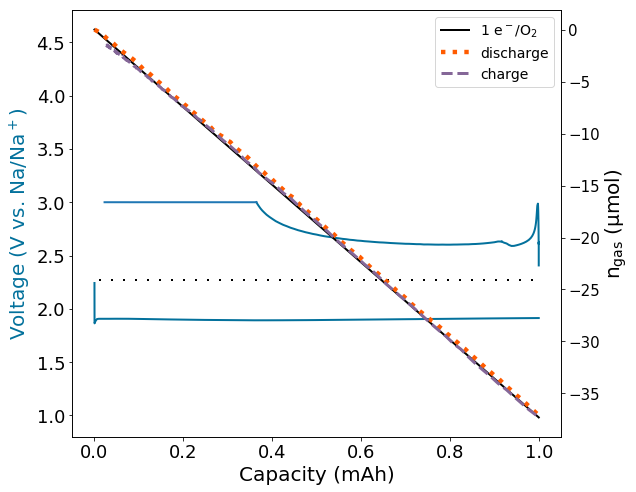

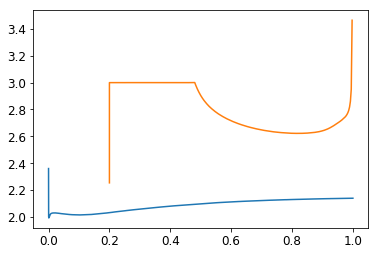

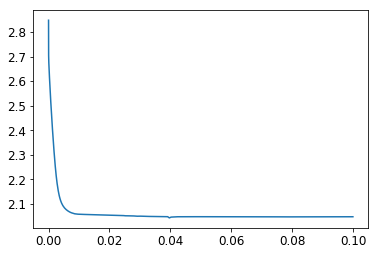

In [47]:
#newBASF= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190315_BASFelytetest_CA/')
#BASFp= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190315_BASFelytetest_CA/190315_BASFelytetest_CA_Ch1__2019-03-16_01.41_18.txt')
#plot_na_CA(newBASF[1], newBASF[3], newBASF[4], newBASF[5], BASFp, 1, 'b')

ptfep50= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190315_P50cathodewithPTFEslurry_CA/')
ptfep = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190315_P50cathodewithPTFEslurry_CA/190315_P50cathodewithPTFEslurry_CA_Ch5__2019-03-16_01.40_54.txt')
#plot_na_CA(ptfep50[1], ptfep50[3], ptfep50[4], ptfep50[5], ptfep, 1, 'b')

c13= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190321_13Ccathode_200Cfurnace_CA/')
c13p=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190321_13Ccathode_200Cfurnace_CA/190321_13Ccathode_200Cfurnace_CA_p_Ch3__2019-03-21_12.01_50.txt')
#plot_na_CA(c13[1], c13[3], c13[4], c13[5], c13p, 3, 'b')
#plt.savefig('/Users/kedzie/Desktop/c13 200C ca.png', transparent = True, dpi=600, bbox_inches='tight')

tci=folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190326_Na_testingTCIelyte_CA/')
tcip= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190326_Na_testingTCIelyte_CA/190326_Na_testingTCIelyte_CA_p_Ch5__2019-03-26_17.05_46.txt')
plot_na_CA(tci[1], tci[3], tci[4], tci[5], tcip, 5, 'b')




ca_80= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190325_Na_SEM_010mAdisch_080mAh_CA_p50/')
ca80p= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190325_Na_SEM_010mAdisch_080mAh_CA_p50/190325_Na_SEM_010mAdisch_080mAh_CA_Ch3__2019-03-25_15.23_24.txt')


plt.figure()
plt.plot(ca_80[1]['Capacity/mA.h'], ca_80[1]['Ewe/V'])
plt.plot(1-ca_80[3]['Capacity/mA.h'], ca_80[3]['Ewe/V'])

xcslow= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190325_Na_SEM_010mAh_disch_XC72/')
plt.figure()
plt.plot(xcslow[1]['Capacity/mA.h'],xcslow[1]['Ewe/V'] )

charge current: 0.5002486484848485mA
total moles of gas consumed: 26.96110041625718
total moles of gas evolved: 25.827437329727175
charge cap= 0.7652144506573677
oer/orr: 0.9540167852781035
final current= 0.015063978


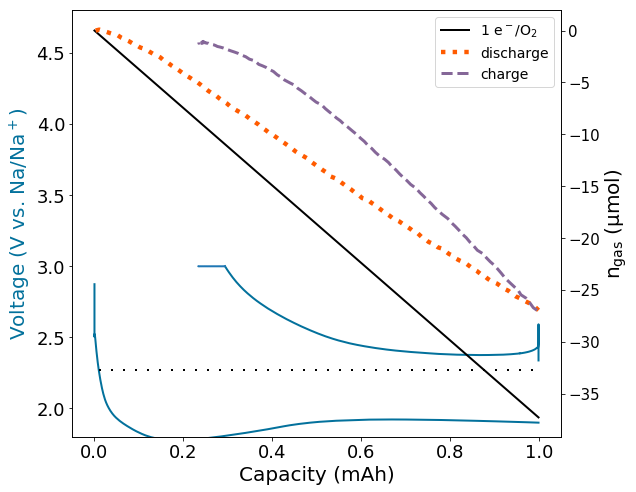

In [51]:
c13= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190206_C13_CA_cycling/')
c13_lv = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190206_C13_CA_cycling/190206_C13_CA_cycling_cycle1_Ch4__2019-02-06_11.12_16.txt')
plot_na_CA(c13[1], c13[3], c13[4], c13[5], c13_lv, 4, 'b' )
#plt.savefig('/Users/kedzie/Desktop/qual figures/190206_C13_CA cycle.png', transparent = True, dpi=600, bbox_inches='tight')



fold= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180823_Na_cycling_chronoamp_cell2/')
p1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180823_Na_cycling_chronoamp_cell2/180823_Na_cycling_chronoamp_cell2_cycle1_p_Ch4__2018-08-23_14.51_59.txt')

#plot_na_CA(fold[3], fold[6],fold[7],fold[8], p1, 4, 'blue')

total moles of gas consumed: 37.37109799103433
total moles of gas evolved: 34.46215506427744
oer/orr: 0.9177729756755718


()

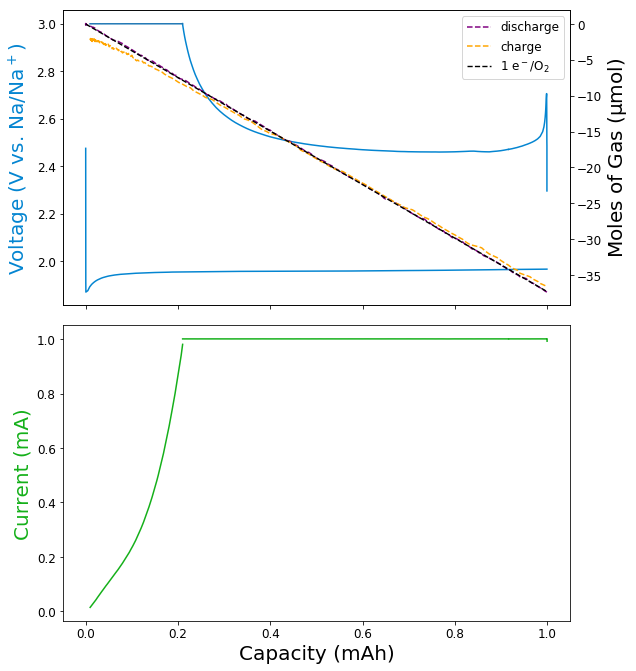

In [117]:


cy4fold= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell2/')
p1=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180814_Na_lowercurrents_cell2/180814_Na_lowercurrents_cell2_cycle1_p_Ch5__2018-08-14_11.12_09.txt')
plot_na_CA(cy4fold[3],cy4fold[6],cy4fold[7],cy4fold[8], p1, 5, 'blue')


In [20]:


#this data is for cycling Na with CA 3 times and then a final 4th discharge; this cell looked weird on the
#third cycle with the discharge only going to 0.5mAh and the pressure slope being much steeper

cy3fold= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190115_Na_3cycle_discharge_titration/')
p3cy=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190115_Na_3cycle_discharge_titration/190115_Na_3cycle_discharge_titration_p_Ch5__2019-01-15_13.32_38.txt')



plt.figure()
i=490
j=1000
plt.plot(cy3fold[2]['Capacity/mA.h'], cy3fold[2]['Ewe/V'], label='1')

plt.plot(cy3fold[4]['Capacity/mA.h'], cy3fold[4]['Ewe/V'], label='2')

plt.plot(cy3fold[6]['Capacity/mA.h'], cy3fold[6]['Ewe/V'], label='3')
plt.plot(cy3fold[8]['Capacity/mA.h'], cy3fold[8]['Ewe/V'], label='4')
plt.legend()

plt.figure()
plt.plot(cy3fold[2]['Capacity/mA.h'], cy3fold[2]['<I>/mA'], label='1')

plt.plot(cy3fold[4]['Capacity/mA.h'], cy3fold[4]['<I>/mA'], label='2')

plt.plot(cy3fold[6]['Capacity/mA.h'], cy3fold[6]['<I>/mA'], label='3')
plt.plot(cy3fold[8]['Capacity/mA.h'], cy3fold[8]['I/mA'], label='4')
plt.legend()
disch1 = cy3fold[2].iloc[np.isclose(cy3fold[2]['Ns'], 1)]
chrg1 = cy3fold[2].iloc[np.isclose(cy3fold[2]['Ns'], 2)]

plt.figure()
plt.plot(disch1['Capacity/mA.h'], disch1['Ewe/V'])
plt.plot(chrg1['Capacity/mA.h'], chrg1['Ewe/V'])
plt.plot(chrg1['Capacity/mA.h'], chrg1['<I>/mA'])
print(chrg1['<I>/mA'].iloc[388])


#print(chrg1['time/s'].iloc[-1]/3600)



        

KeyError: 'Capacity/mA.h'

<Figure size 432x288 with 0 Axes>

In [ ]:
cy2= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/180823_Na_cycling_chronoamp_cell1/')
plt.figure()
end = cy2[6]['Capacity/mA.h'].iloc[-1]
plt.plot(cy2[3]['Capacity/mA.h'], cy2[3]['Ewe/V'])
plt.plot(cy2[6]['Capacity/mA.h'], cy2[6]['Ewe/V'])
plt.plot(cy2[7]['Capacity/mA.h'] + end , cy2[7]['Ewe/V'])
plt.plot(cy2[7]['Capacity/mA.h'].iloc[-1] + end + cy2[8]['Capacity/mA.h'], cy2[8]['Ewe/V'])

plt.plot(cy2[13]['Capacity/mA.h'], cy2[13]['Ewe/V'])
plt.plot(cy2[16]['Capacity/mA.h'], cy2[16]['Ewe/V'])
plt.plot(cy2[17]['Capacity/mA.h'] + cy2[16]['Capacity/mA.h'].iloc[-1] , cy2[17]['Ewe/V'])
plt.plot(cy2[17]['Capacity/mA.h'].iloc[-1] + cy2[18]['Capacity/mA.h'] +cy2[16]['Capacity/mA.h'].iloc[-1], cy2[18]['Ewe/V'])


NUM_COLORS = 8

cm = plt.get_cmap('summer')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
ax.plot(cy2[3]['Capacity/mA.h'], cy2[3]['Ewe/V'], color=cm(1.*0/NUM_COLORS))
ax.plot(1-cy2[6]['Capacity/mA.h'], cy2[6]['Ewe/V'], color=cm(1.*0/NUM_COLORS))
ax.plot(1-cy2[7]['Capacity/mA.h'] - end , cy2[7]['Ewe/V'])
ax.plot(1-cy2[7]['Capacity/mA.h'].iloc[-1] - end - cy2[8]['Capacity/mA.h'], cy2[8]['Ewe/V'])




ax.plot(cy2[13]['Capacity/mA.h'], cy2[13]['Ewe/V'])
ax.plot(1-cy2[16]['Capacity/mA.h'], cy2[16]['Ewe/V'])
ax.plot(1-cy2[17]['Capacity/mA.h'] - cy2[16]['Capacity/mA.h'].iloc[-1] , cy2[17]['Ewe/V'])
ax.plot(1-cy2[17]['Capacity/mA.h'].iloc[-1] - cy2[18]['Capacity/mA.h'] - cy2[16]['Capacity/mA.h'].iloc[-1], cy2[18]['Ewe/V'])


#for i in range(NUM_COLORS):
#    ax.plot(np.arange(10)*(i+1))
plt.show()





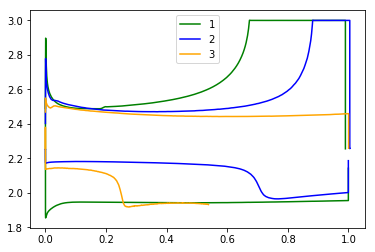

In [286]:


cy3foldcell1= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2018/181219_Na_CA_3cells/181219_3cycles_discharge_cell2/')

plt.figure()
plt.plot(cy3foldcell1[2]['Capacity/mA.h'][:417], cy3foldcell1[2]['Ewe/V'][:417], 'g', label='1')
plt.plot(cy3foldcell1[2]['Capacity/mA.h'][468:], cy3foldcell1[2]['Ewe/V'][468:], 'g',label='')

plt.plot(cy3foldcell1[4]['Capacity/mA.h'][:454], cy3foldcell1[4]['Ewe/V'][:454], 'b', label='2')
plt.plot(cy3foldcell1[4]['Capacity/mA.h'][519:], cy3foldcell1[4]['Ewe/V'][519:], 'b',label='')

plt.plot(cy3foldcell1[6]['Capacity/mA.h'][:2175], cy3foldcell1[6]['Ewe/V'][:2175], color='orange' ,label='3')
plt.plot(cy3foldcell1[6]['Capacity/mA.h'][2180:], cy3foldcell1[6]['Ewe/V'][2180:], color='orange' ,label='')
plt.legend()
#plt.savefig('/Users/kedzie/Desktop/3cyclesbad.png', transparent = True, dpi=600, bbox_inches='tight')







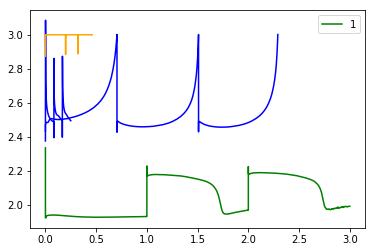

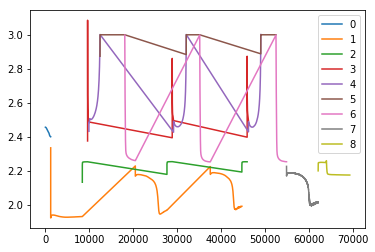

In [290]:
ca2= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/190123_Na_3cycles_discharge_nogcpl/')
plt.figure()

plt.plot(ca2[1]['Capacity/mA.h'], ca2[1]['Ewe/V'], 'g', label='1')

plt.plot(ca2[3]['Capacity/mA.h'], ca2[3]['Ewe/V'], 'b', label='')
plt.plot(ca2[4]['Capacity/mA.h'], ca2[4]['Ewe/V'], 'b', label='')

plt.plot(ca2[5]['Capacity/mA.h'], ca2[5]['Ewe/V'], label='', color='orange')

plt.legend()
#plt.savefig('/Users/kedzie/Desktop/3cyclesgood.png', transparent = True, dpi=600, bbox_inches='tight')




plt.figure()
#using gcpl to cycle
for i in range(len(ca2)):
    if 'Ewe/V' in ca2[i]:
        plt.plot(ca2[i]['time/s'], ca2[i]['Ewe/V'], label=str(i))
    
    else:
        plt.plot(ca2[i]['time/s'], ca2[i]['<Ewe>/V'], label=str(i))
plt.legend()


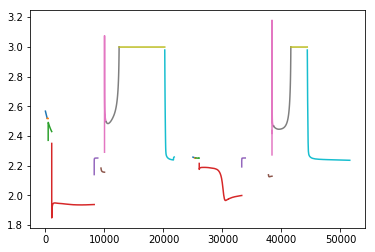

In [178]:
plt.figure()
for i in range(10):
    if 'Ewe/V' in cy2[i]:
        plt.plot(cy2[i]['time/s'], cy2[i]['Ewe/V'], label=str(i))
    
    else:
        plt.plot(cy2[i]['time/s'], cy2[i]['<Ewe>/V'], label=str(i))
for i in range(10,len(cy2)):
    if 'Ewe/V' in cy2[i]:
        plt.plot(cy2[i]['time/s']+25000, cy2[i]['Ewe/V'], label=str(i))
    
    else:
        plt.plot(cy2[i]['time/s']+25000, cy2[i]['<Ewe>/V'], label=str(i))


